# Setup

This notebook is a test notebook in which I check that everything was installed correctly. I used this YOLO section on my Windows 11 with an external NVIDIA GPU. To that end, I installed the necessary packages (see `README.md`) with NVIDIA GPU compatibility.

Source: [Selecting GPUs in PyTorch](https://amytabb.com/til/2021/04/14/selecting-gpus-pytorch/).

### GPU

In [1]:
import os
import torch
import torchvision

In [2]:
torch.__version__

'1.13.0+cu117'

In [3]:
# Get info of all GPU devices
!nvidia-smi

Mon May  8 12:25:11 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.79                 Driver Version: 531.79       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA T500                   WDDM | 00000000:01:00.0 Off |                  N/A |
| N/A   52C    P8               N/A /  N/A|      0MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
# Set environment variable with possible device ids
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
print(os.environ["CUDA_VISIBLE_DEVICES"])
# Set device: 0 or 1
# NOTE: indices are not necessarily the ones shown by nvidia-smi
# We need to try them with the cell below
torch.cuda.set_device("cuda:0")

0,1


In [5]:
# Check that the selected device is the desired one
print("Torch version?", torch.__version__)
print("Torchvision version?", torchvision.__version__)
print("Is cuda available?", torch.cuda.is_available())
print("Is cuDNN version:", torch.backends.cudnn.version())
print("cuDNN enabled? ", torch.backends.cudnn.enabled)
print("Device count?", torch.cuda.device_count())
print("Current device?", torch.cuda.current_device())
print("Device name? ", torch.cuda.get_device_name(torch.cuda.current_device()))

x = torch.rand(5, 3)
print(x)

Torch version? 1.13.0+cu117
Torchvision version? 0.14.0+cu117
Is cuda available? True
Is cuDNN version: 8500
cuDNN enabled?  True
Device count? 2
Current device? 0
Device name?  NVIDIA GeForce RTX 3060
tensor([[0.3786, 0.1366, 0.9441],
        [0.8639, 0.6505, 0.5956],
        [0.2134, 0.8358, 0.3074],
        [0.2410, 0.3383, 0.8551],
        [0.0147, 0.5669, 0.1726]])


## Dataset Inspection

In [6]:
import cv2
import matplotlib.pyplot as plt

In [14]:
# Load the RGB image
img = cv2.imread('data/captured/img11.png')

In [15]:
img.shape

(480, 640, 3)

In [16]:
# Convert the image from BGR to RGB color space
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

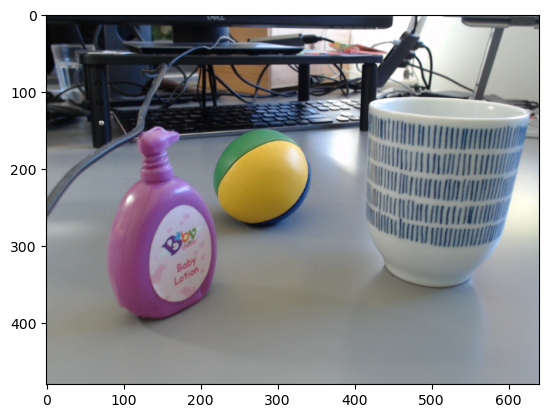

In [17]:
# Plot the image
plt.imshow(img_rgb)
plt.show()

In [20]:
# Resize, if necessary
new_size = (224, 224)
resized_img = cv2.resize(img, new_size)

In [21]:
# Save the resized image
cv2.imwrite('resized_image.png', resized_img)

True

### Roboflow Dataset Download

In [30]:
# Get API key:
# Projects > Settings > Roboflow API: Private API Key, Show
# Do not publish this key
# Alternatively, persist in local file, don't commit,
# and load from file
with open('roboflow.key', 'r') as file:
    api_key = file.read().strip()

In [31]:
from roboflow import Roboflow

# Public Dataset
rf = Roboflow(api_key=api_key)
project = rf.workspace("project-coewi").project("sakis2")
# This will download to the local folder the dataset directory
# with the specified format
dataset = project.version(2).download("yolov7")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to sakis2-2 in yolov7pytorch:: 100%|████████████████| 864/864 [00:00<00:00, 1610.45it/s]


In [34]:
# My own dataset, uploaded to Roboflow
rf = Roboflow(api_key=api_key)
project = rf.workspace("mikel-sagardia-tknfd").project("basic-object-detection-qkmda")
dataset = project.version(1).download("yolov7")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Basic-Object-Detection-1 in yolov7pytorch:: 100%|█| 178/178 [00:00<00:00, 1047.17it/s
